In [106]:
import pickle
import pandas as pd
import os
from skimage.io import imread
from  torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch
from PIL import Image
import numpy as np

In [183]:
image_dim = 224

def show_sample(sample):
    """
    Displays a sample as they come out of the trainloader.
    """

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(sample['caption'], size=20)
    ax1.imshow(sample['full_image'])
    ax2.imshow(sample['masked_image'])
    plt.show()

class COCODataset(Dataset):
    def __init__(self, annotations, datadir, transform=None):
        """
        Dataset of obfuscated coco images, with captions.
        
        annotations: load from pickle, akshay's processed annotations
        datadir: Preprocessed data. Contains /originals and /masked
        tranforms: function to be run on each sample
        """
        
        self.datadir = datadir
        self.transform = transform
        self.annotations = annotations
        self.filenames = os.listdir(os.path.join(datadir, "originals"))
        
    def __len__(self):
        return len(self.filenames) * 5
    
    def __getitem__(self, idx):
        """
        Gets images from the dataset.
        
        Each image has 5 replicas, with different captions and sections
        
        Returns: dictionary with blanked out ['image'] and ['caption']
            image: FloatTensor
            caption: string (may later be a list)
        """

        # Load image
        image_filename = self.filenames[idx // 5]
        image_id = int(image_filename.split(".")[0])
        image_filepath = os.path.join(self.datadir, "originals", image_filename)
        full_image_arr = np.load(image_filepath)
        
        full_image = torch.FloatTensor(full_image_arr)

        # Fetch annotation, black out area
        
        anno = self.annotations[image_id][idx % 5]
        
        masked_image_arr = np.load(os.path.join(self.datadir, "masked", str(image_id) + f"_masked_{idx % 5}.npy"))
        masked_image = torch.FloatTensor(masked_image_arr)
        
        sample = {'masked_image': masked_image, 'caption': anno['caption'], 'full_image': full_image, 'image_id':image_id}
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample

In [184]:
%%time
annos = pd.read_pickle("./annotations_train2017.pickle")
dataset_train = COCODataset(annos, "./data/train2017_processed")

CPU times: user 1.91 s, sys: 80 ms, total: 1.99 s
Wall time: 1.98 s


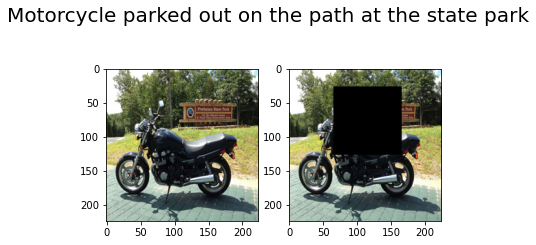

CPU times: user 854 ms, sys: 4.43 ms, total: 858 ms
Wall time: 207 ms


In [185]:
%%time
show_sample(dataset_train.__getitem__(0))

In [190]:
trainloader = DataLoader(dataset_train, batch_size=100, shuffle=False)

In [191]:
%%time
count = 0
for b in trainloader:
    #print(type(b['full_image']))
    break

CPU times: user 18.6 s, sys: 292 ms, total: 18.9 s
Wall time: 362 ms


In [160]:
len(dataset_train) / 87.36

6770.089285714285

In [ ]:
annos([])